In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [3]:
cust=pd.read_csv("cust_cleaned.csv")

### label Encoding

#### one hot encodine

In [10]:
#one hoting for sexo, indresi,indext,indfall,ind_nuveo
hotcode_label=["sexo",'indresi','indext','indfall','ind_nuevo']
cust=pd.get_dummies(data=cust,columns=hotcode_label)
cust.head()

,ind_empleado,pais_residencia,age,fecha_alta,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,...,sexo_H,sexo_V,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0
0,N,ES,35,2015-01-12,6,1.0,1.0,A,KHL,MALAGA,...,1,0,0,1,1,0,1,0,1,0
1,N,ES,23,2012-08-10,35,1.0,1.0,I,KHE,CIUDAD REAL,...,0,1,0,1,0,1,1,0,1,0
2,N,ES,23,2012-08-10,35,1.0,1.0,I,KHE,CIUDAD REAL,...,0,1,0,1,1,0,1,0,1,0
3,N,ES,22,2012-08-10,35,1.0,1.0,I,KHD,ZARAGOZA,...,1,0,0,1,1,0,1,0,1,0
4,N,ES,23,2012-08-10,35,1.0,1.0,A,KHE,ZARAGOZA,...,0,1,0,1,1,0,1,0,1,0


#### Frequency encoding

In [12]:
freq_nomprov = (cust.groupby('nomprov').size())/len(cust)
freq_pais_residencia = (cust.groupby('pais_residencia').size())/len(cust)
freq_canal_entrada = (cust.groupby('canal_entrada').size())/len(cust)


cust.loc[:,'nomprov'] = cust['nomprov'].map(freq_nomprov)
cust.loc[:,'pais_residencia'] = cust['pais_residencia'].map(freq_pais_residencia)
cust.loc[:,'canal_entrada'] = cust['canal_entrada'].map(freq_canal_entrada)


In [13]:
#label Encoding: Ordinal variables 
#indrel, indrel_1mes, tiprel_1mes
tiprel_1mes_dict = {'A':3,'I':1,'P':2}
indrel_dict = {1:2,99:1}
indrel_1mes_dict = {1:3,2:2,3:1}


cust['tiprel_1mes']=cust.tiprel_1mes.map(tiprel_1mes_dict)
cust['indrel']=cust.indrel.map(indrel_dict)
cust['indrel_1mes']=cust.indrel_1mes.map(indrel_1mes_dict)


In [14]:
cust.drop(['fecha_alta'],axis=1,inplace=True)

In [15]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641992 entries, 0 to 641991
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ind_empleado           641992 non-null  object 
 1   pais_residencia        641992 non-null  float64
 2   age                    641992 non-null  int64  
 3   antiguedad             641992 non-null  int64  
 4   indrel                 641992 non-null  int64  
 5   indrel_1mes            641992 non-null  int64  
 6   tiprel_1mes            641992 non-null  int64  
 7   canal_entrada          641992 non-null  float64
 8   nomprov                641992 non-null  float64
 9   ind_actividad_cliente  641992 non-null  float64
 10  renta                  641992 non-null  float64
 11  ind_ahor_fin_ult1      641992 non-null  int64  
 12  ind_aval_fin_ult1      641992 non-null  int64  
 13  ind_cco_fin_ult1       641992 non-null  int64  
 14  ind_cder_fin_ult1      641992 non-nu

In [16]:
cust_copy= cust.copy()

In [21]:
for col in cust_copy.columns:
    if  cust_copy[col].dtypes  != "int":
        LE =LabelEncoder()
        cust_copy[col]= LE.fit_transform( cust_copy[col])

In [22]:
cust_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641992 entries, 0 to 641991
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   ind_empleado           641992 non-null  int64
 1   pais_residencia        641992 non-null  int64
 2   age                    641992 non-null  int64
 3   antiguedad             641992 non-null  int64
 4   indrel                 641992 non-null  int64
 5   indrel_1mes            641992 non-null  int64
 6   tiprel_1mes            641992 non-null  int64
 7   canal_entrada          641992 non-null  int64
 8   nomprov                641992 non-null  int64
 9   ind_actividad_cliente  641992 non-null  int64
 10  renta                  641992 non-null  int64
 11  ind_ahor_fin_ult1      641992 non-null  int64
 12  ind_aval_fin_ult1      641992 non-null  int64
 13  ind_cco_fin_ult1       641992 non-null  int64
 14  ind_cder_fin_ult1      641992 non-null  int64
 15  ind_cno_fin_ult1 

### Scaling and fiting

In [25]:
sc = StandardScaler()
scaled_data=sc.fit_transform(cust_copy)
scaled_data=pd.DataFrame(scaled_data,columns=cust_copy.columns)
scaled_data.head()

,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,sexo_H,sexo_V,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0
0,0.027563,0.057527,-0.357157,-0.043778,0.035631,0.007644,0.906835,-2.999846,0.312479,0.882778,...,1.117712,-1.117712,-0.077215,0.077215,0.214011,-0.214011,0.050746,-0.050746,0.025919,-0.025919
1,0.027563,0.057527,-1.067344,-0.027361,0.035631,0.007644,-1.102799,0.366467,-1.224246,-1.132787,...,-0.894685,0.894685,-0.077215,0.077215,-4.672653,4.672653,0.050746,-0.050746,0.025919,-0.025919
2,0.027563,0.057527,-1.067344,-0.027361,0.035631,0.007644,-1.102799,0.366467,-1.224246,-1.132787,...,-0.894685,0.894685,-0.077215,0.077215,0.214011,-0.214011,0.050746,-0.050746,0.025919,-0.025919
3,0.027563,0.057527,-1.126527,-0.027361,0.035631,0.007644,-1.102799,-0.082375,0.141732,-1.132787,...,1.117712,-1.117712,-0.077215,0.077215,0.214011,-0.214011,0.050746,-0.050746,0.025919,-0.025919
4,0.027563,0.057527,-1.067344,-0.027361,0.035631,0.007644,0.906835,0.366467,0.141732,0.882778,...,-0.894685,0.894685,-0.077215,0.077215,0.214011,-0.214011,0.050746,-0.050746,0.025919,-0.025919


### Model Building
#### K-means

In [29]:
kmeans= KMeans(n_clusters=5,n_init=10,max_iter=100,random_state=0)

#fitting the model
kmeans.fit(scaled_data)

clusters = kmeans.labels_
clusters

array([4, 0, 0, ..., 4, 4, 4], dtype=int32)

### PCA -visualization on the XY plane

In [35]:
pca = PCA(n_components=2,random_state=0)

principal_cp=pca.fit_transform(scaled_data)
principal_cp_df= pd.DataFrame(principal_cp,columns=['PC1', 'PC2'])

principal_cp_df["Cluster"]=clusters+1

## Viewing the Data
principal_cp_df.head()


,PC1,PC2,Cluster
0,-0.597614,-0.196342,5
1,-2.054519,3.058336,1
2,-1.701473,-0.387236,1
3,-1.194450,-0.374871,1
4,-0.489352,-0.237125,5


In [36]:
principal_cp_df["Label"]= principal_cp_df["Cluster"].map({1:"cluster 1",2:"cluster 2",3:"cluster 3",4:"cluster 4",5:"cluster 5"})
principal_cp_df.head(5)


,PC1,PC2,Cluster,Label
0,-0.597614,-0.196342,5,cluster 5
1,-2.054519,3.058336,1,cluster 1
2,-1.701473,-0.387236,1,cluster 1
3,-1.194450,-0.374871,1,cluster 1
4,-0.489352,-0.237125,5,cluster 5


/home/maha/.local/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

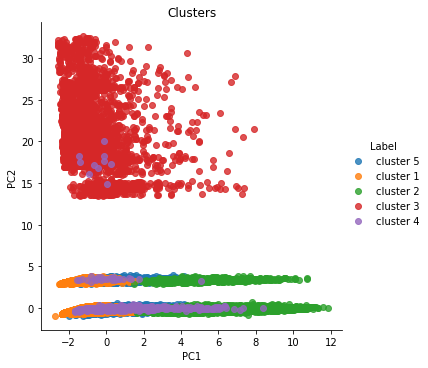

In [41]:

plt.figure(figsize=(10,20))
ax=sns.lmplot(data=principal_cp_df,x="PC1",y="PC2",hue="Label",fit_reg=False,legend=True, legend_out=True)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()



### Model Evaluation

#### Elbow Method

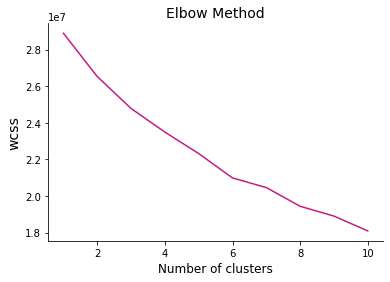

In [42]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(scaled_data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()


#### the perfect number of clusters

In [44]:
from kneed import KneeLocator

k1 = KneeLocator(range(1, 11), wcss, curve = "convex", direction = "decreasing")
k1.elbow


6

In [46]:
principal_cp_df['Cluster'].value_counts()

5    288909
1    288290
2     59349
3      3795
4      1649
Name: Cluster, dtype: int64

#### davies_bouldin_score

In [47]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(principal_cp, clusters)

3.8837355339396664

### Model Saving

In [48]:
cust["Label"] = principal_cp_df["Label"]
cust["Cluster"] = principal_cp_df["Cluster"]
cust.head()

,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0,Label,Cluster
0,N,0.994073,35,6,2,3,3,0.001160,0.027784,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5
1,N,0.994073,23,35,2,3,1,0.319767,0.008771,0.0,...,0,1,0,1,1,0,1,0,cluster 1,1
2,N,0.994073,23,35,2,3,1,0.319767,0.008771,0.0,...,0,1,1,0,1,0,1,0,cluster 1,1
3,N,0.994073,22,35,2,3,1,0.009020,0.025186,0.0,...,0,1,1,0,1,0,1,0,cluster 1,1
4,N,0.994073,23,35,2,3,3,0.319767,0.025186,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5


In [49]:
C1 = cust[cust["Cluster"] == 1]
C1.head()

,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0,Label,Cluster
1,N,0.994073,23,35,2,3,1,0.319767,0.008771,0.0,...,0,1,0,1,1,0,1,0,cluster 1,1
2,N,0.994073,23,35,2,3,1,0.319767,0.008771,0.0,...,0,1,1,0,1,0,1,0,cluster 1,1
3,N,0.994073,22,35,2,3,1,0.009020,0.025186,0.0,...,0,1,1,0,1,0,1,0,cluster 1,1
5,N,0.994073,23,35,2,3,1,0.319767,0.013117,0.0,...,0,1,1,0,1,0,1,0,cluster 1,1
6,N,0.994073,23,35,2,3,1,0.319767,0.006042,0.0,...,0,1,1,0,1,0,1,0,cluster 1,1


In [51]:
C2 = cust[cust["Cluster"] == 2]
C2.head()



,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0,Label,Cluster
68,N,0.994073,30,35,2,3,3,0.245207,0.008128,1.0,...,0,1,1,0,1,0,1,0,cluster 2,2
72,N,0.994073,39,35,2,3,3,0.245207,0.008128,1.0,...,0,1,1,0,1,0,1,0,cluster 2,2
121,N,0.994073,33,35,2,3,3,0.319767,0.046519,1.0,...,0,1,1,0,1,0,1,0,cluster 2,2
141,N,0.994073,23,35,2,3,3,0.319767,0.025186,1.0,...,0,1,1,0,1,0,1,0,cluster 2,2
187,N,0.994073,31,35,2,3,3,0.319767,0.344766,1.0,...,0,1,0,1,1,0,1,0,cluster 2,2


In [52]:
C3= cust[cust["Cluster"] == 3]
C3.head()

,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0,Label,Cluster
1980,N,0.000040,53,35,2,3,3,0.280047,0.344766,1.0,...,1,0,1,0,1,0,1,0,cluster 3,3
4041,N,0.000185,34,35,2,3,3,0.245207,0.344766,1.0,...,1,0,1,0,1,0,1,0,cluster 3,3
4239,N,0.000087,40,35,2,3,3,0.280047,0.344766,1.0,...,1,0,1,0,1,0,1,0,cluster 3,3
5755,N,0.000037,28,35,2,3,3,0.245207,0.344766,1.0,...,1,0,1,0,1,0,1,0,cluster 3,3
14671,N,0.000044,43,34,2,3,3,0.034798,0.344766,1.0,...,1,0,0,1,1,0,1,0,cluster 3,3


In [53]:
C4 = cust[cust["Cluster"] == 4]
C4.head()

,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0,Label,Cluster
4674,N,0.994073,60,35,2,3,1,0.245207,0.046519,0.0,...,0,1,1,0,0,1,1,0,cluster 4,4
4725,N,0.994073,48,35,2,3,1,0.245207,0.046776,0.0,...,0,1,1,0,0,1,1,0,cluster 4,4
18391,N,0.994073,58,34,2,3,3,0.245207,0.007031,1.0,...,0,1,1,0,0,1,1,0,cluster 4,4
21591,N,0.994073,25,36,2,3,1,0.319767,0.085965,0.0,...,0,1,1,0,0,1,1,0,cluster 4,4
22613,N,0.994073,98,36,2,3,3,0.245207,0.046519,1.0,...,0,1,1,0,0,1,1,0,cluster 4,4


In [54]:
C5 = cust[cust["Cluster"] == 5]
C5.head()

,ind_empleado,pais_residencia,age,antiguedad,indrel,indrel_1mes,tiprel_1mes,canal_entrada,nomprov,ind_actividad_cliente,...,indresi_N,indresi_S,indext_N,indext_S,indfall_N,indfall_S,ind_nuevo_0.0,ind_nuevo_1.0,Label,Cluster
0,N,0.994073,35,6,2,3,3,0.001160,0.027784,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5
4,N,0.994073,23,35,2,3,3,0.319767,0.025186,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5
7,N,0.994073,23,35,2,3,3,0.319767,0.025186,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5
12,N,0.994073,23,35,2,3,3,0.319767,0.003746,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5
13,N,0.994073,65,35,2,3,3,0.319767,0.025186,1.0,...,0,1,1,0,1,0,1,0,cluster 5,5
